### Lab 1
#### Jennifer Vo

This lab will explore various reporting basics in physics research, such as how sigma relates to probability, and analytical distributions.

In [2]:
# First I'll import the libraries I will need in this lab.
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#### A Little Statistics
##### Part 1

To start off, let us try to integrate a standard normal distribution. For different values of sigma, I will use the built-in stats function stats.norm.cdf() to determine the probability corresponding to that sigma value. When conducting an experiment, the probability that the background noise gives me a data point that looks as or more signal-like than the reading I have, would be equal to the probability if my data was Gaussian distributed (of width 1) and I was $X\sigma$ away from the mean.

Let's try sigma values of 1.0, 1.2, and 1.4.

In [3]:
sigma1 = 1.0
prob1 = stats.norm.cdf(sigma1)
print(f'The probability is {prob1:.4f} for {sigma1:.2f} sigma.')

The probability is 0.8413 for 1.00 sigma.


In [4]:
sigma2 = 1.2
prob2 = stats.norm.cdf(sigma2)
print(f'The probability is {prob2:.4f} for {sigma2:.2f} sigma.')

The probability is 0.8849 for 1.20 sigma.


In [5]:
sigma3 = 1.4
prob3 = stats.norm.cdf(sigma3)
print(f'The probability is {prob3:.4f} for {sigma3:.2f} sigma.')

The probability is 0.9192 for 1.40 sigma.


Cross-checking this with a Z-table, you can see that the probabilities generated are correct for the corresponding sigmas (Z values).

Alternatively, to calculate the probability for a given sigma value, you can call the error function, erfc(), which is related to the normal distribution by the following formula:
The probability that a standard normal variate assumes a value in the interval [0, z] is given by $\phi = $ 0.5 * erfc(z/$\sqrt(2)$), thus the probability that the value is greater than z would be 1-$\phi$

In [7]:
prob1prime = 1 - 0.5*scipy.special.erfc(sigma1/(2**0.5))
print(f'The probability of {sigma1:.2f} sigma is {prob1prime:.4f}.')

The probability of 1.00 sigma is 0.8413.


We can also confirm that our previously calculated probabilities are correct:

In [8]:
sigmaA = stats.norm.ppf(prob1)
sigmaB = stats.norm.ppf(prob2)
sigmaC = stats.norm.ppf(prob3)

print(f'The sigma associated with {prob1:.4f} is {sigmaA:.2f}.')
print(f'The sigma associated with {prob2:.4f} is {sigmaB:.2f}.')
print(f'The sigma associated with {prob3:.4f} is {sigmaC:.2f}.')

The sigma associated with 0.8413 is 1.00.
The sigma associated with 0.8849 is 1.20.
The sigma associated with 0.9192 is 1.40.


In [9]:
# Here is an example of pulling a probability from a Z-table and finding the corresponding sigma. This could also be the probability you find 
# from integrating a probability density function up to a specific value.
sigmaD = stats.norm.ppf(0.97725)
print(f'To obtain a probability of 97.725% we would need a sigma of {sigmaD:.2f}.')

To obtain a probability of 97.725% we would need a sigma of 2.00.


In [10]:
# TO-DO: REVISE THIS LAST PART.
# In what case would we obtain a negative sigma? If we are integrating to a value below the mean (to the left). 
sigmaE = stats.norm.ppf(0.49)
print('For a probability of less than 50%, we would expect a negative sigma.')
print(f'For example, a probability of 49% is associated with sigma {sigmaE:.2f}.')

For a probability of less than 50%, we would expect a negative sigma.
For example, a probability of 49% is associated with sigma -0.03.


##### Part 2

Now, I will explore a continuous analytic distribution. The exponential distribution is the probability distribution of the time between events in a Poission point process, in which events occur continuously and independently at a constant average rate. The exponential distribution is memoryless, meaning the distribution of a "waiting time" until a certain event does not depend on how much time has elapsed already. The probability density function (pdf) and cumulative distribution function (cdf) are the following, both defined only for $x >= 0$:

pdf = $\lambda e^{-\lambda x}$

cdf = $1-e^{-\lambda x}$

To set this up, we'll first create an empty plot, and generate 100k samples for the exponential pdf with the built-in stats function, stats.expon.

In [11]:
plt.rcParams["figure.figsize"] = (15,10)

In [12]:
# For stats.expon, the parameter "scale" is defined as scale = 1 / lambda
# So here I will use a lambda of 3, and the default location of 0.
d = stats.expon.rvs(size = 100000, loc = 0, scale = 1/3)

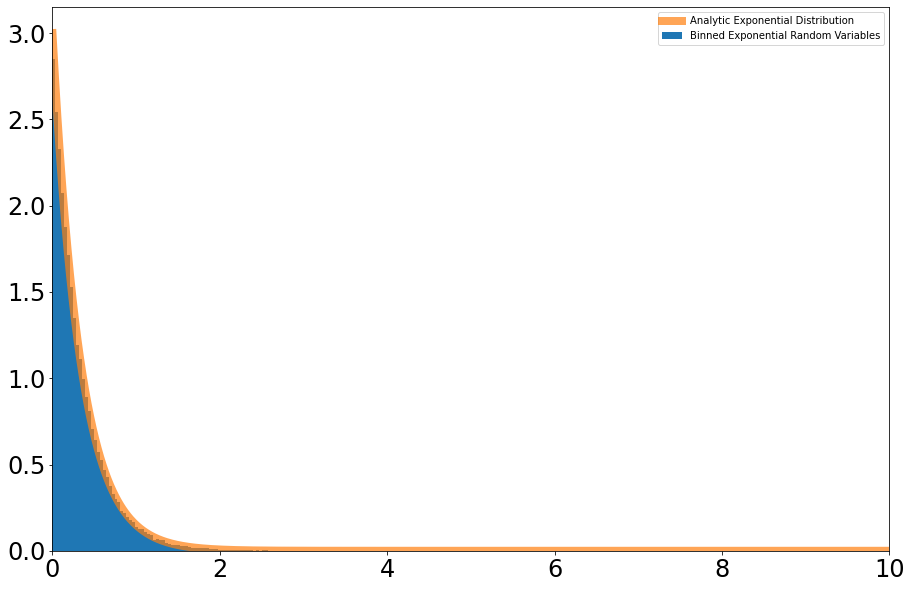

In [13]:
# We'll take the samples, group them into 50 bins, and normalize before plotting on a graph. 
fig, ax = plt.subplots(1, 1)
ax.hist(d, 100, density=True, label='Binned Exponential Random Variables')

# Here I change the plot parameters
plt.tick_params(labelsize = 24)
plt.xlim([0,10])

# I create a linear space for x from 0 to 10, with 1000 values between, to use as input values for the analytic distribution
x = np.linspace(0,10,1000)

# Lastly, I can plot the analytic distribution with lambda = 3, again scale = 1/lambda
a = 3
ax.plot(x,stats.expon.pdf(x, loc = 0, scale = 1/a), linewidth = 8, alpha = 0.7, label='Analytic Exponential Distribution')
plt.legend()
plt.show()

What happens if I plot this on a semi-log graph? Plotting a Gaussian on a semi-log graph shows an upside-down parabola. For an exponential distribution, you would expect a negative linear plot.

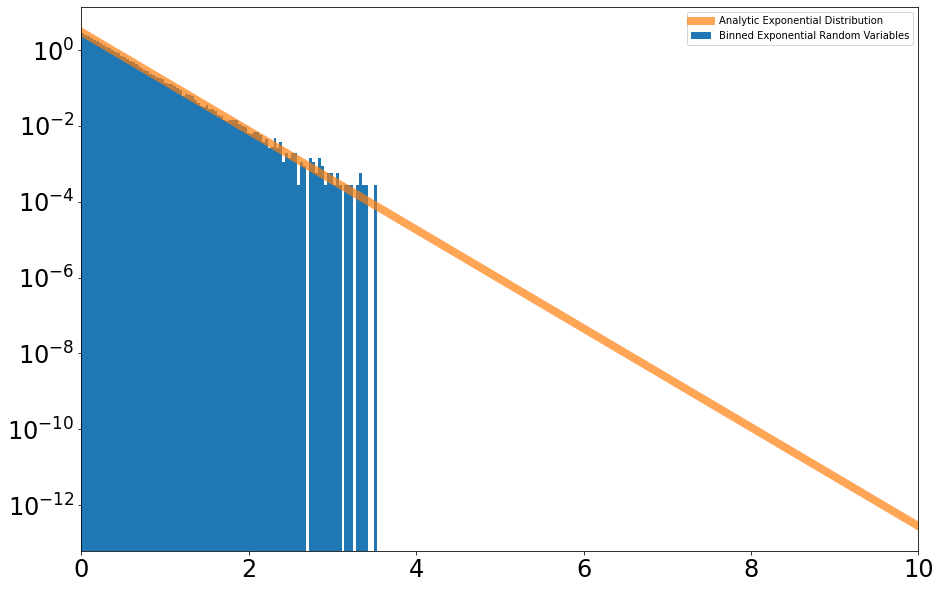

In [14]:
# We will repeat all of the steps before, except we will plot it on a graph where y is on log-scale. 
fig, ax = plt.subplots(1, 1)
ax.hist(d, 100, density=True, label='Binned Exponential Random Variables')

plt.tick_params(labelsize = 24)
plt.xlim([0,10])

x = np.linspace(0,10,1000)

a = 3
ax.plot(x,stats.expon.pdf(x, loc = 0, scale = 1/a), linewidth = 8, alpha = 0.7, label='Analytic Exponential Distribution')
plt.yscale('log')
plt.legend()
plt.show()

As we can see, the semi-log plot of the exponential distribution looks approximately linear, which is what we were expecting.

##### Part 3

Next, I will imagine I have some signal-free data that follows an exponential distribution. In this hypothetical scenario, I have a specific measurement of x = 1.8, and I would like to know the answer to the following question:
##### "What is the probability that the data produced a signal that is equally or more signal-like than what I observed?"
In other words, what are the odds that the data point x = 1.8 was produced by background noise?

We can represent the answer to this question mathematically with the following integral:

Probability = $\int_{1.8}^{\infty}$ pdf(x) dx = $\int_{1.8}^{\infty}\lambda e^{-\lambda x}$ dx 

Let's calculate this probability for x = 1.8 and convert it into an equivalent sigma value.

In [45]:
x = 1.8
prob_expon = stats.expon.cdf(x)
print(f'The probability that the data produced a signal equally or more signal-like that what I observed is {prob_expon:.4f}.')

The probability that the data produced a signal equally or more signal-like that what I observed is 0.8347.


In [46]:
# Convert into equivalent sigma value
sigma_expon = stats.norm.ppf(prob_expon)
print(f'The corresponding sigma probability for this is {sigma_expon:.2f}.')

The corresponding sigma probability for this is 0.97.


##### Part 4
I can try a few different values of observed data to look for patterns in the probability and sigma values.

In [48]:
x1 = 3
x2 = 5
x3 = 10

prob_expon1 = stats.expon.cdf(x1)
prob_expon2 = stats.expon.cdf(x2)
prob_expon3 = stats.expon.cdf(x3)

sigma_expon1 = stats.norm.ppf(prob_expon1)
sigma_expon2 = stats.norm.ppf(prob_expon2)
sigma_expon3 = stats.norm.ppf(prob_expon3)

print(f'The probability that the data produced a signal equally or more signal-like than x = {x1:.1f} is {prob_expon1:.4f}.')
print(f'The corresponding sigma probability for this is {sigma_expon1:.2f}.')
print(f'The probability that the data produced a signal equally or more signal-like than x = {x2:.1f} is {prob_expon2:.4f}.')
print(f'The corresponding sigma probability for this is {sigma_expon2:.2f}.')
print(f'The probability that the data produced a signal equally or more signal-like than x = {x3:.1f} is {prob_expon3:.8f}.')
print(f'The corresponding sigma probability for this is {sigma_expon3:.2f}.')

The probability that the data produced a signal equally or more signal-like than x = 3.0 is 0.9502.
The corresponding sigma probability for this is 1.65.
The probability that the data produced a signal equally or more signal-like than x = 5.0 is 0.9933.
The corresponding sigma probability for this is 2.47.
The probability that the data produced a signal equally or more signal-like than x = 10.0 is 0.99995460.
The corresponding sigma probability for this is 3.91.


As I observe higher data values, the probability that the data produced a signal equally or more signal-like than that data value increases, and the corresponding sigma increases. 